In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def definir_tipo(x):
    tipos_apartamento = ['Apartamento', 'Departamento Compartido']
    if x in ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Quinta Vacacional']:
        return 'Casa'
    elif x in ['Apartamento', 'Departamento Compartido']:
        return 'Apartamento'
    return x

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': int, 'usosmultiples': int, 'piscina': int, 'escuelascercanas': int,
        'centroscomercialescercanos': int, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0,0,0,0,0,1150000


In [5]:
df = data
df['Todos los amenities'] = (data['gimnasio'] * data['usosmultiples'] * data['piscina'] * data['escuelascercanas'] * data['centroscomercialescercanos']) > 0
data['Algun amenity'] = (data['gimnasio'] + data['usosmultiples'] + data['piscina'] + data['escuelascercanas'] + data['centroscomercialescercanos']) > 0

todos_los_amenities = df.loc[df['Todos los amenities'] > 0]
sin_todos_los_amenities = df.loc[df['Todos los amenities'] == 0]

Text(0.5, 0.98, 'Propiedades con vs. sin todos los amenities')

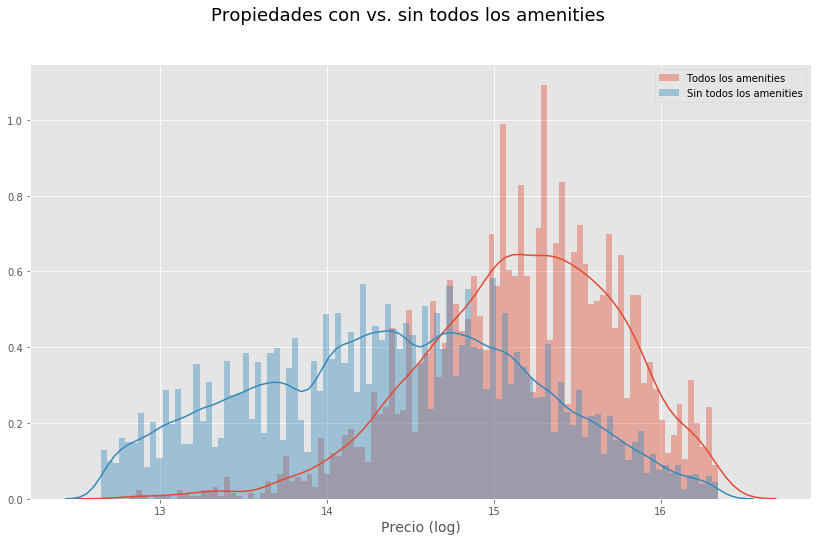

In [6]:
plt.figure(figsize=(14, 8))

sns.distplot(np.log(todos_los_amenities['precio']), bins = 100, label = 'Todos los amenities' )
sns.distplot(np.log(sin_todos_los_amenities['precio']), bins = 100, label = 'Sin todos los amenities')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin todos los amenities', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin algun amenity')

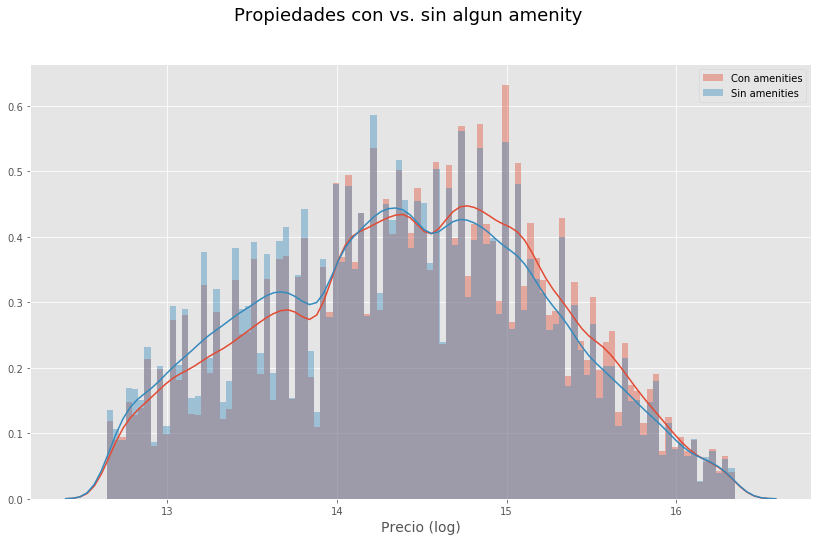

In [7]:
algun_amenity = df.loc[df['Algun amenity'] > 0 ]
ningun_amenity = df.loc[df['Algun amenity'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(algun_amenity['precio']), bins = 100, label = 'Con amenities' )
sns.distplot(np.log(ningun_amenity['precio']), bins = 100, label = 'Sin amenities')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin algun amenity', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin gimnasio')

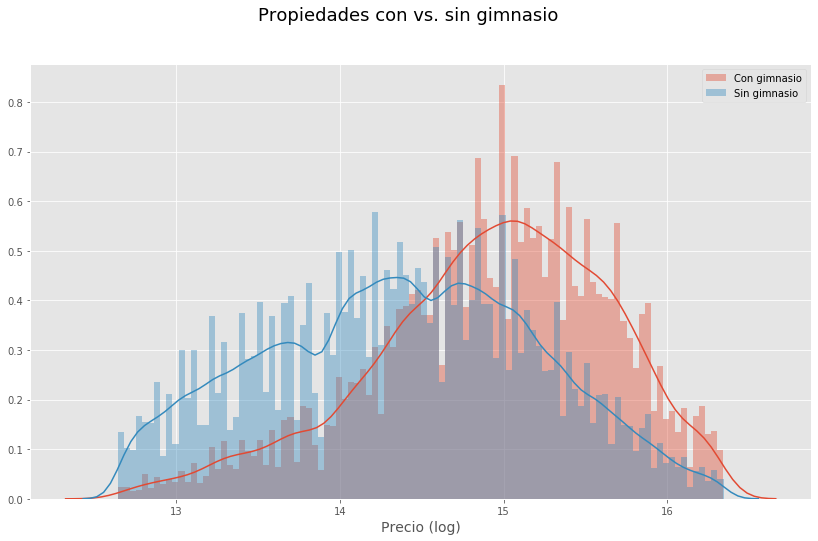

In [8]:
con = df.loc[df['gimnasio'] > 0 ]
sin = df.loc[df['gimnasio'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(con['precio']), bins = 100, label = 'Con gimnasio' )
sns.distplot(np.log(sin['precio']), bins = 100, label = 'Sin gimnasio')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin gimnasio', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin piscina')

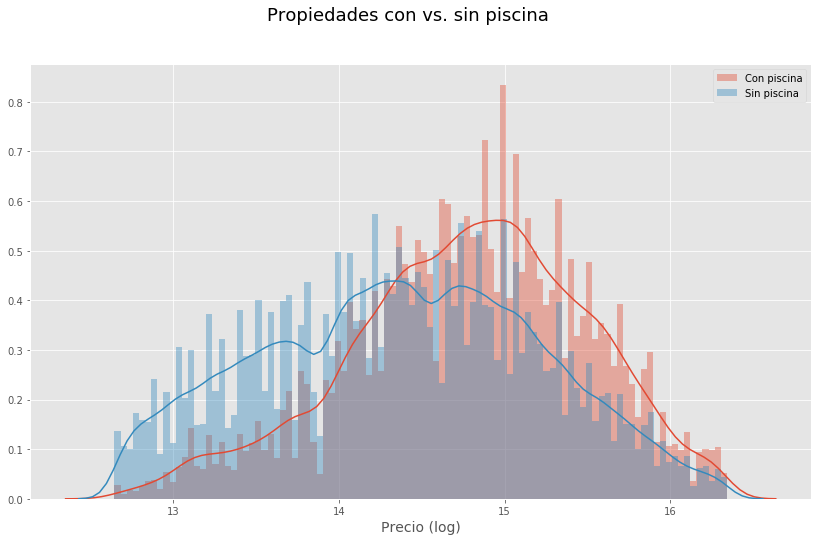

In [9]:
con = df.loc[df['piscina'] > 0 ]
sin = df.loc[df['piscina'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(con['precio']), bins = 100, label = 'Con piscina' )
sns.distplot(np.log(sin['precio']), bins = 100, label = 'Sin piscina')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin piscina', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin SUM')

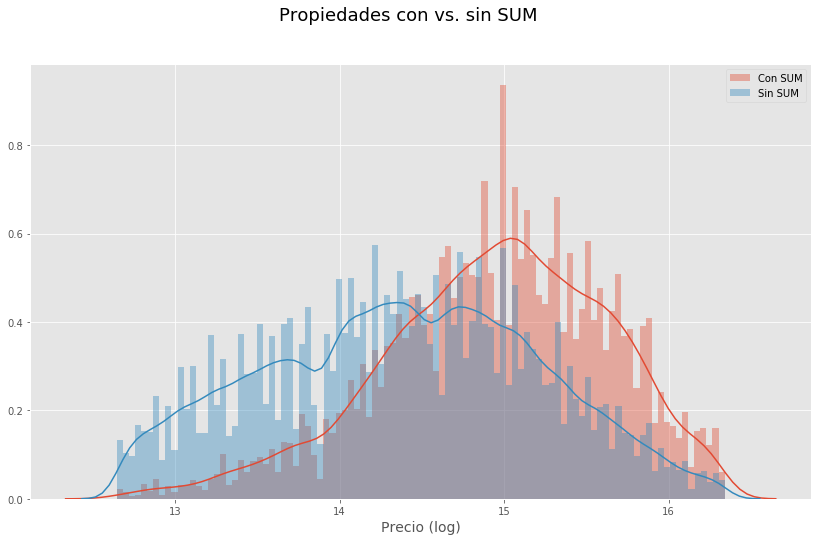

In [10]:
con = df.loc[df['usosmultiples'] > 0 ]
sin = df.loc[df['usosmultiples'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(con['precio']), bins = 100, label = 'Con SUM' )
sns.distplot(np.log(sin['precio']), bins = 100, label = 'Sin SUM')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin SUM', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin escuelas cercanas')

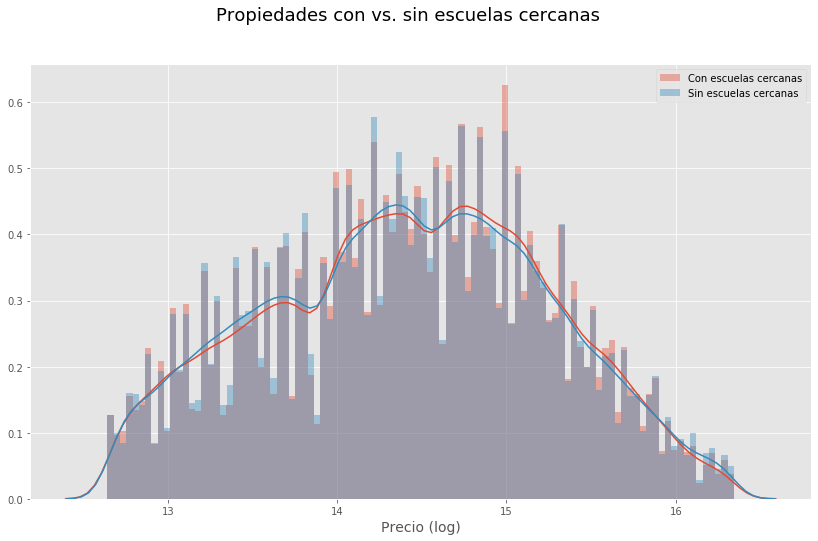

In [11]:
con = df.loc[df['escuelascercanas'] > 0 ]
sin = df.loc[df['escuelascercanas'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(con['precio']), bins = 100, label = 'Con escuelas cercanas' )
sns.distplot(np.log(sin['precio']), bins = 100, label = 'Sin escuelas cercanas')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin escuelas cercanas', fontsize=18)

Text(0.5, 0.98, 'Propiedades con vs. sin centros comerciales cercanos')

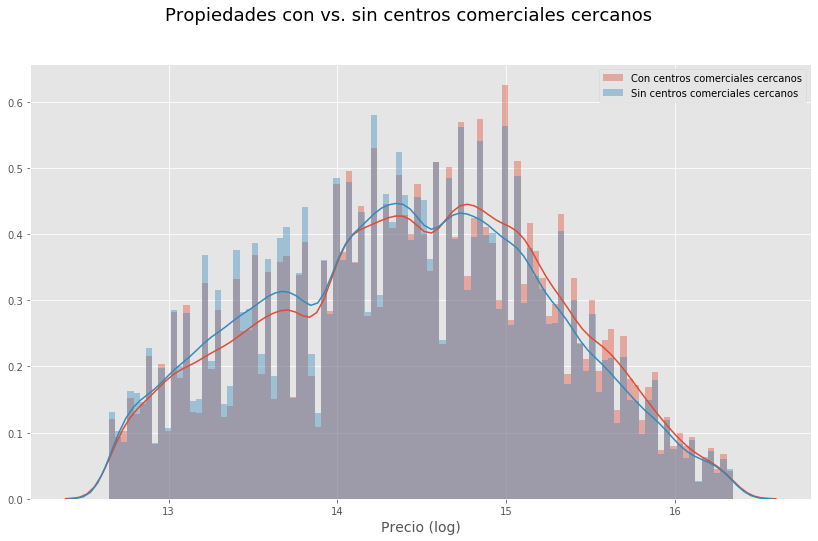

In [12]:
con = df.loc[df['centroscomercialescercanos'] > 0 ]
sin = df.loc[df['centroscomercialescercanos'] == 0 ]

plt.figure(figsize=(14, 8))

sns.distplot(np.log(con['precio']), bins = 100, label = 'Con centros comerciales cercanos' )
sns.distplot(np.log(sin['precio']), bins = 100, label = 'Sin centros comerciales cercanos')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()
plt.suptitle('Propiedades con vs. sin centros comerciales cercanos', fontsize=18)